---
title: Basic Perceptron
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def activation_sgn(input_scalar):
    return(np.sign(input_scalar))

def activation_id(input_scalar):
    return(input_scalar)

def activation_tanh(input_scalar):
    return(np.tanh(input_scalar))

def activation_relu(input_scalar):
    return(np.maximum(0, input_scalar))

def testfun2d(input_scalar):
    return(np.sign(input_scalar + 0.2638))

rng = np.random.default_rng(42)

#learning rate
a = 0.1

#tolerance
eps = 0.001

#training-epochs
e = 10_000


### Datasets

In [ ]:
#2D Dataset
x = np.linspace(-1, 1)
y = testfun2d(x)
dataset2d = np.column_stack((x, y))

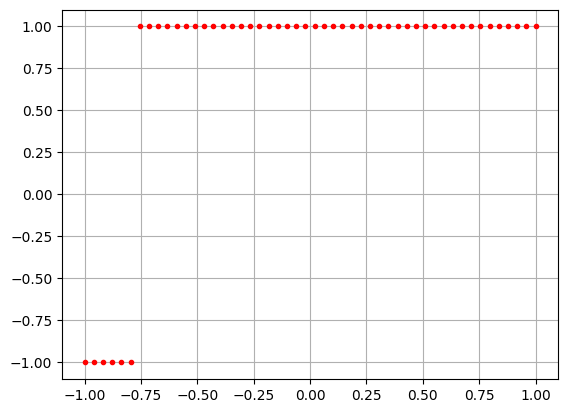

In [28]:
plt.plot(x,y, ".r")
plt.grid()
plt.show()

### The Perceptron

**Atributes**  
x = input  
w =  weights  
b = bias  
$\sigma$ = activation function  


**Update Rule (weights)**

$w \leftarrow \eta * y * x $ 

**Update Rule (bias)** 

$b \leftarrow b + \eta * y $

In [79]:
class perceptron:
    """
    input: numeric, 1D Vector for data input
    weights: numeric, 1D Vector for perceptron weights
    bias: numeric, 1D Vector for perceptron bias
    output: numeric, calculated value after activation (Scalar)
    activation: fun, activation Function (R -> any) 
    """
    def __init__(self, n_inputs, activation_fun):
        self.input = np.empty(shape = [0,n_inputs], dtype = np.float16)
        self.weights = rng.uniform(-1, 1, n_inputs).astype(np.float16)
        self.bias = np.array([0])
        self.output = None
        self.activation = activation_fun

    def status(self):
        print(f"input vector:{self.input}")
        print(f"weight vector:{self.weights}")
        print(f"bias:{self.bias}")
        print(f"output:{self.output}")
        print(f"activation function:{self.activation}")

    def reinit_weights(self, low = -1, high = 1):
        self.weights = rng.uniform(low, high, len(self.weights)).astype(np.float16)

    def update_input(self, new_input):
        self.input = new_input

    def update_weights(self, y, eta):
        self.weights = self.weights + eta * y * self.input
    
    def calculate_output(self):
        self.output = self.activation(np.dot(self.weights, self.input.T) + self.bias) 

    def update_bias(self, y, eta):
        self.bias = self.bias + eta * y


In [57]:
pct_a = perceptron(1, activation_tanh)
print(type(pct_a))
print(pct_a.status())

<class '__main__.perceptron'>
input vector:[]
weight vector:[-0.12225]
bias:[0]
output:None
activation function:<function activation_tanh at 0x000002BB21908360>
None


#basic training with manual data input

In [ ]:
#input data
x = np.array([2], dtype = np.float16)
pct_a.update_input(x)
print(pct_a.status())

#initially calculate output
pct_a.calculate_output()
pct_a.output

while (np.abs(pct_a.output - y) > eps):
    print(pct_a.output)
    pct_a.update_weights(y=y, eta=a)
    pct_a.update_bias(y=y, eta=a)
    pct_a.calculate_output()
    print(pct_a.output)


[0.60436778]
[0.49048593]
[0.49048593]
[0.35696207]
[0.35696207]
[0.20706221]
[0.20706221]
[0.04676586]
[0.04676586]
[-0.11597579]
[-0.11597579]
[-0.27271997]
[-0.27271997]
[-0.41621073]
[-0.41621073]
[-0.541588]
[-0.541588]
[-0.64675497]
[-0.64675497]
[-0.73198953]


### training single feature (2D)

In [ ]:
for _ in range(e):
    for xi, yi in dataset2d:
        pct_a.update_input(xi)
        pct_a.calculate_output()
        if (np.abs(pct_a.output - yi) > eps):
            pct_a.update_weights(yi, a)
            pct_a.update_bias(yi, a)
        

In [59]:
pct_a.status()

input vector:1.0
weight vector:[80.82060372]
bias:[61.6]
output:[1.]
activation function:<function activation_tanh at 0x000002BB21908360>


### generate predictions

In [61]:
y_hat = np.empty(1)
for i in range(len(x)):
    pct_a.update_input(x[i])
    pct_a.calculate_output()
    y_hat = np.append(y_hat, pct_a.output)

In [76]:
y_hat

array([ 1.        , -1.        , -1.        , -1.        , -0.99999998,
       -0.99998832, -0.99147142,  0.51697108,  0.99913197,  0.99999882,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ])

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

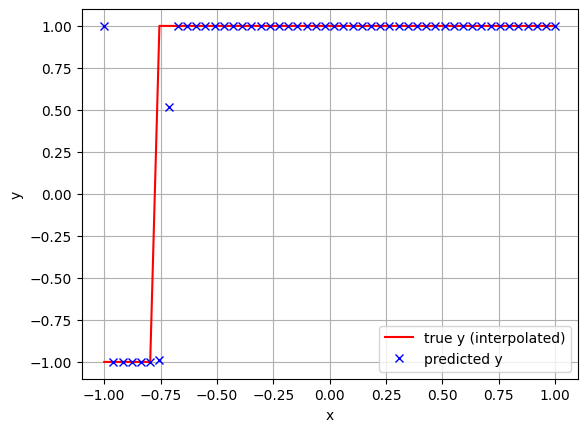

In [77]:

plt.plot(x, y, "r-", label = "true y (interpolated)")
plt.plot(x, y_hat[:50], "bx", label = "predicted y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.plot